# Rubik with IDA*

Random surface..
start next threshold
start next threshold
start next threshold
start next threshold
start next threshold
start next threshold
start next threshold
start next threshold
start next threshold
start next threshold
Found Solution!!!
rotate +Z2..
rotate -X2..
rotate -Z1..


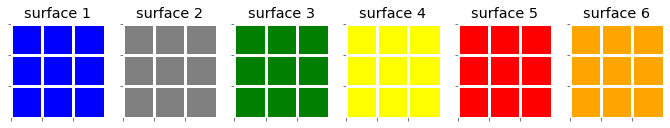

In [5]:
#ui+rubrick ok
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import tkinter as tk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib import colors
import random
from copy import deepcopy
import json
import time
import csv
import pickle

filename = 'RandomForestRegressor18_model.sav'
model = pickle.load(open(filename, 'rb'))
sol_number = 1
plt.style.use('ggplot')

array = np.array([
    [[0, 0, 2], [1, 0, 2], [2, 0, 2]],
    [[0, 0, 1], [1, 0, 1], [2, 0, 1]],
    [[0, 0, 0], [1, 0, 0], [2, 0, 0]],
    [[0, 0, 2], [0, 1, 2], [0, 2, 2]],
    [[0, 0, 1], [0, 1, 1], [0, 2, 1]],
    [[0, 0, 0], [0, 1, 0], [0, 2, 0]],
    [[0, 0, 0], [1, 0, 0], [2, 0, 0]],
    [[0, 1, 0], [1, 1, 0], [2, 1, 0]],
    [[0, 2, 0], [1, 2, 0], [2, 2, 0]],
    [[2, 0, 0], [2, 0, 1], [2, 0, 2]],
    [[2, 1, 0], [2, 1, 1], [2, 1, 2]],
    [[2, 2, 0], [2, 2, 1], [2, 2, 2]],
    [[2, 0, 2], [1, 0, 2], [0, 0, 2]],
    [[2, 1, 2], [1, 1, 2], [0, 1, 2]],
    [[2, 2, 2], [1, 2, 2], [0, 2, 2]],
    [[0, 2, 0], [1, 2, 0], [2, 2, 0]],
    [[0, 2, 1], [1, 2, 1], [2, 2, 1]],
    [[0, 2, 2], [1, 2, 2], [2, 2, 2]],
])


def manhattan_distance(cube, i, z, corner):
    c1 = array[i, z]
    center = None
    for c in [1, 4, 7, 10, 13, 16]:
        if cube[i, z] == cube[c, 1]:
            center = c
            break

    if corner:
        c2 = array[center - 1, 0]
        d1 = abs(c1[0] - c2[0]) + abs(c1[1] - c2[1]) + abs(c1[2] - c2[2])
        c2 = array[center - 1, 2]
        d2 = abs(c1[0] - c2[0]) + abs(c1[1] - c2[1]) + abs(c1[2] - c2[2])
        c2 = array[center + 1, 0]
        d3 = abs(c1[0] - c2[0]) + abs(c1[1] - c2[1]) + abs(c1[2] - c2[2])
        c2 = array[center + 1, 2]
        d4 = abs(c1[0] - c2[0]) + abs(c1[1] - c2[1]) + abs(c1[2] - c2[2])
        return min(d1, d2, d3, d4)
    else:
        c2 = array[center - 1, 1]
        d1 = abs(c1[0] - c2[0]) + abs(c1[1] - c2[1]) + abs(c1[2] - c2[2])
        c2 = array[center, 0]
        d2 = abs(c1[0] - c2[0]) + abs(c1[1] - c2[1]) + abs(c1[2] - c2[2])
        c2 = array[center, 2]
        d3 = abs(c1[0] - c2[0]) + abs(c1[1] - c2[1]) + abs(c1[2] - c2[2])
        c2 = array[center + 1, 1]
        d4 = abs(c1[0] - c2[0]) + abs(c1[1] - c2[1]) + abs(c1[2] - c2[2])
        return min(d1, d2, d3, d4)

def corner_edge_sum_max(cube):
    corners = 0
    edges = 0
    for i in range(18):
        if i % 3 == 0 or i % 3 == 2:
            corners = corners + manhattan_distance(cube, i, 0, True) + manhattan_distance(cube, i, 2, True)
            edges = edges + manhattan_distance(cube, i, 1, False)
        else:
            edges = edges + manhattan_distance(cube, i, 0, False) + manhattan_distance(cube, i, 2, False)
    return max(corners / 12, edges / 8)

def convert_exgitform(a):
    x = np.array([])

    for i in ['5','4','1','2','3','6']:
        x = np.append(x, a[i])

    x = x.reshape(18,3)
    x = np.where(x == 0, 'R', x)
    x = np.where(x == '1.0', 'B', x)
    x = np.where(x == '2.0', 'O', x)
    x = np.where(x == '3.0', 'G', x)
    x = np.where(x == '4.0', 'W', x)
    x = np.where(x == '5.0', 'Y', x)
    
    return x

def clockwise(x,n):
    def clockwise1(x): 
        y = np.zeros(9).reshape(3,3)
        y[:,0] = x[2]
        y[:,1] = x[1]
        y[:,2] = x[0]
        return y
        
    for i in range(n):
        x = clockwise1(x)
    
    return x

def counter_clockwise(x,n):
    def counter_clockwise1(x): 
        y = np.zeros(9).reshape(3,3)
        y[:,0] = np.flip(x[0])
        y[:,1] = np.flip(x[1])
        y[:,2] = np.flip(x[2])
        return y
        
    for i in range(n):
        x = counter_clockwise1(x)
    
    return x

def slide_right4ele(a,b,c,d,n):
    x = np.append([np.append(a,b)],[np.append(c,d)])
    x = np.append(x[-n:],x[:-n])
    return x[0:3],x[3:6],x[6:9],x[9:12]
    
def rotate(surface,axis):
    surface = deepcopy(surface)
    if axis == '+x0':
        a,b,c,d = slide_right4ele(surface['1'][0],surface['2'][0],surface['3'][0],surface['4'][0],3)
        surface['1'][0] = a
        surface['2'][0] = b
        surface['3'][0] = c
        surface['4'][0] = d

        surface['5'] = clockwise(surface['5'],3)
    elif axis == '-x0':
        for i in range(3):
            a,b,c,d = slide_right4ele(surface['1'][0],surface['2'][0],surface['3'][0],surface['4'][0],3)
            surface['1'][0] = a
            surface['2'][0] = b
            surface['3'][0] = c
            surface['4'][0] = d

            surface['5'] = clockwise(surface['5'],3)
            
    elif axis == '+x1':
        a,b,c,d = slide_right4ele(surface['1'][1],surface['2'][1],surface['3'][1],surface['4'][1],3)
        surface['1'][1] = a
        surface['2'][1] = b
        surface['3'][1] = c
        surface['4'][1] = d
    elif axis == '-x1':
        for i in range(3):
            a,b,c,d = slide_right4ele(surface['1'][1],surface['2'][1],surface['3'][1],surface['4'][1],3)
            surface['1'][1] = a
            surface['2'][1] = b
            surface['3'][1] = c
            surface['4'][1] = d
            
    elif axis == '+x2':
        a,b,c,d = slide_right4ele(surface['1'][2],surface['2'][2],surface['3'][2],surface['4'][2],3)
        surface['1'][2] = a
        surface['2'][2] = b
        surface['3'][2] = c
        surface['4'][2] = d
        
        surface['6'] = counter_clockwise(surface['6'],3)
    elif axis == '-x2':
        for i in range(3):
            a,b,c,d = slide_right4ele(surface['1'][2],surface['2'][2],surface['3'][2],surface['4'][2],3)
            surface['1'][2] = a
            surface['2'][2] = b
            surface['3'][2] = c
            surface['4'][2] = d

            surface['6'] = counter_clockwise(surface['6'],3)
            
    elif axis == '+y0':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,-1]),surface['5'][:,0],surface['1'][:,0],surface['6'][:,0],3)
        surface['3'][:,-1] = np.flip(a)
        surface['5'][:,0] = b
        surface['1'][:,0] = c
        surface['6'][:,0] = d
        
        surface['4'] = counter_clockwise(surface['4'],3)
    elif axis == '-y0':
        for i in range(3):
            a,b,c,d = slide_right4ele(np.flip(surface['3'][:,-1]),surface['5'][:,0],surface['1'][:,0],surface['6'][:,0],3)
            surface['3'][:,-1] = np.flip(a)
            surface['5'][:,0] = b
            surface['1'][:,0] = c
            surface['6'][:,0] = d

            surface['4'] = counter_clockwise(surface['4'],3)
    elif axis == '+y1':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,1]),surface['5'][:,1],surface['1'][:,1],surface['6'][:,1],3)
        surface['3'][:,1] = np.flip(a)
        surface['5'][:,1] = b
        surface['1'][:,1] = c
        surface['6'][:,1] = d
    elif axis == '-y1':
        for i in range(3):
            a,b,c,d = slide_right4ele(np.flip(surface['3'][:,1]),surface['5'][:,1],surface['1'][:,1],surface['6'][:,1],3)
            surface['3'][:,1] = np.flip(a)
            surface['5'][:,1] = b
            surface['1'][:,1] = c
            surface['6'][:,1] = d
    
    elif axis == '+y2':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,0]),surface['5'][:,2],surface['1'][:,2],surface['6'][:,2],3)
        surface['3'][:,0] = np.flip(a)
        surface['5'][:,2] = b
        surface['1'][:,2] = c
        surface['6'][:,2] = d
        
        surface['2'] = clockwise(surface['2'],3)
    elif axis == '-y2':
        for i in range(3):
            a,b,c,d = slide_right4ele(np.flip(surface['3'][:,0]),surface['5'][:,2],surface['1'][:,2],surface['6'][:,2],3)
            surface['3'][:,0] = np.flip(a)
            surface['5'][:,2] = b
            surface['1'][:,2] = c
            surface['6'][:,2] = d

            surface['2'] = clockwise(surface['2'],3)
    elif axis == '+z0':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][2]),surface['2'][:,0],np.flip(surface['6'][0]),np.flip(surface['4'][:,2]),3)
        surface['5'][2] = a
        surface['2'][:,0] = np.flip(b)
        surface['6'][0] = np.flip(c)
        surface['4'][:,2] = np.flip(d)
        
        surface['1'] = counter_clockwise(surface['1'],3)
    elif axis == '-z0':
        for i in range(3):
            a,b,c,d = slide_right4ele(np.flip(surface['5'][2]),surface['2'][:,0],np.flip(surface['6'][0]),np.flip(surface['4'][:,2]),3)
            surface['5'][2] = a
            surface['2'][:,0] = np.flip(b)
            surface['6'][0] = np.flip(c)
            surface['4'][:,2] = np.flip(d)

            surface['1'] = counter_clockwise(surface['1'],3)
    elif axis == '+z1':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][1]),surface['2'][:,1],np.flip(surface['6'][1]),np.flip(surface['4'][:,1]),3)
        surface['5'][1] = a
        surface['2'][:,1] = np.flip(b)
        surface['6'][1] = np.flip(c)
        surface['4'][:,1] = np.flip(d)
    elif axis == '-z1':
        for i in range(3):
            a,b,c,d = slide_right4ele(np.flip(surface['5'][1]),surface['2'][:,1],np.flip(surface['6'][1]),np.flip(surface['4'][:,1]),3)
            surface['5'][1] = a
            surface['2'][:,1] = np.flip(b)
            surface['6'][1] = np.flip(c)
            surface['4'][:,1] = np.flip(d)
    elif axis == '+z2':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][0]),surface['2'][:,2],np.flip(surface['6'][2]),np.flip(surface['4'][:,0]),3)
        surface['5'][0] = a
        surface['2'][:,2] = np.flip(b)
        surface['6'][2] = np.flip(c)
        surface['4'][:,0] = np.flip(d)
        
        surface['3'] = clockwise(surface['3'],3)
    elif axis == '-z2':
        for i in range(3):
            a,b,c,d = slide_right4ele(np.flip(surface['5'][0]),surface['2'][:,2],np.flip(surface['6'][2]),np.flip(surface['4'][:,0]),3)
            surface['5'][0] = a
            surface['2'][:,2] = np.flip(b)
            surface['6'][2] = np.flip(c)
            surface['4'][:,0] = np.flip(d)
            
            surface['3'] = clockwise(surface['3'],3)
        
    return surface

def updateUi_surface(data):
       
    cmap = colors.ListedColormap(['blue','gray','green','yellow','red','orange'])
    bounds = [0,1,2,3,4,5,6]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    
    ax[0].imshow(data['1'], cmap=cmap, norm=norm)
    ax[0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0].axes.xaxis.set_ticklabels([])
    ax[0].axes.yaxis.set_ticklabels([])
    ax[0].set_title('surface 1')

    ax[1].imshow(data['2'], cmap=cmap, norm=norm)
    ax[1].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1].axes.xaxis.set_ticklabels([])
    ax[1].axes.yaxis.set_ticklabels([])
    ax[1].set_title('surface 2')

    ax[2].imshow(data['3'], cmap=cmap, norm=norm)
    ax[2].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[2].set_xticks(np.arange(-.5, 2.5, 1));
    ax[2].set_yticks(np.arange(-.5, 2.5, 1));
    ax[2].axes.xaxis.set_ticklabels([])
    ax[2].axes.yaxis.set_ticklabels([])
    ax[2].set_title('surface 3')

    ax[3].imshow(data['4'], cmap=cmap, norm=norm)
    ax[3].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[3].set_xticks(np.arange(-.5, 2.5, 1));
    ax[3].set_yticks(np.arange(-.5, 2.5, 1));
    ax[3].axes.xaxis.set_ticklabels([])
    ax[3].axes.yaxis.set_ticklabels([])
    ax[3].set_title('surface 4')

    ax[4].imshow(data['5'], cmap=cmap, norm=norm)
    ax[4].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[4].set_xticks(np.arange(-.5, 2.5, 1));
    ax[4].set_yticks(np.arange(-.5, 2.5, 1));
    ax[4].axes.xaxis.set_ticklabels([])
    ax[4].axes.yaxis.set_ticklabels([])
    ax[4].set_title('surface 5')

    ax[5].imshow(data['6'], cmap=cmap, norm=norm)
    ax[5].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[5].set_xticks(np.arange(-.5, 2.5, 1));
    ax[5].set_yticks(np.arange(-.5, 2.5, 1));
    ax[5].axes.xaxis.set_ticklabels([])
    ax[5].axes.yaxis.set_ticklabels([])
    ax[5].set_title('surface 6')
        
    line.draw()
    
def BX0():
    global start_surface
    print('rotate +X0.. ')
    start_surface = rotate(start_surface,'+x0')
    updateUi_surface(start_surface)
def BLX0():
    global start_surface
    print('rotate -X0.. ')
    start_surface = rotate(start_surface,'-x0')
    updateUi_surface(start_surface) 
def BX1():
    global start_surface
    print('rotate +X1..')
    start_surface = rotate(start_surface,'+x1')
    updateUi_surface(start_surface)
def BLX1():
    global start_surface
    print('rotate -X1..')
    start_surface = rotate(start_surface,'-x1')
    updateUi_surface(start_surface) 
def BX2():
    global start_surface
    print('rotate +X2..')
    start_surface = rotate(start_surface,'+x2')
    updateUi_surface(start_surface)
def BLX2():
    global start_surface
    print('rotate -X2..')
    start_surface = rotate(start_surface,'-x2')
    updateUi_surface(start_surface)
def BY0():
    global start_surface
    print('rotate +Y0..')
    start_surface = rotate(start_surface,'+y0')
    updateUi_surface(start_surface)
def BLY0():
    global start_surface
    print('rotate -Y0..')
    start_surface = rotate(start_surface,'-y0')
    updateUi_surface(start_surface)
def BY1():
    global start_surface
    print('rotate +Y1..')
    start_surface = rotate(start_surface,'+y1')
    updateUi_surface(start_surface)
def BLY1():
    global start_surface
    print('rotate -Y1..')
    start_surface = rotate(start_surface,'-y1')
    updateUi_surface(start_surface)
def BY2():
    global start_surface
    print('rotate +Y2..')
    start_surface = rotate(start_surface,'+y2')
    updateUi_surface(start_surface)
def BLY2():
    global start_surface
    print('rotate -Y2..')
    start_surface = rotate(start_surface,'-y2')
    updateUi_surface(start_surface)
def BZ0():
    global start_surface
    print('rotate +Z0..')
    start_surface = rotate(start_surface,'+z0')
    updateUi_surface(start_surface)
def BLZ0():
    global start_surface
    print('rotate -Z0..')
    start_surface = rotate(start_surface,'-z0')
    updateUi_surface(start_surface)
def BZ1():
    global start_surface
    print('rotate +Z1..')
    start_surface = rotate(start_surface,'+z1')
    updateUi_surface(start_surface)
def BLZ1():
    global start_surface
    print('rotate -Z1..')
    start_surface = rotate(start_surface,'-z1')
    updateUi_surface(start_surface)
def BZ2():
    global start_surface
    print('rotate +Z2..')
    start_surface = rotate(start_surface,'+z2')
    updateUi_surface(start_surface)
def BLZ2():
    global start_surface
    print('rotate -Z2..')
    start_surface = rotate(start_surface,'-z2')
    updateUi_surface(start_surface)
def SOLVE():
    global sol_number
    sol_number = 1
    SOLVEX()
def SOLVE2():
    global sol_number
    sol_number = 2
    SOLVEX()
def SOLVE3():
    global sol_number
    sol_number = 3
    SOLVEX()

def SOLVEX():
    global start_surface
    
    #init
    current_surface = {'path': 'str','surface':start_surface}
    nodes_expand = unit_expand('str')
    m = 'str'
    mv = find_cost(goal_surface,current_surface['surface'])
    v = mv
    lenge = 0
    kk = 1
    xm = ''
    x = ''
    threshold = 1
    updateUi_surface(current_surface['surface'])
    next_threshold = 1
    found = False

    #loop
    iteration = 0
    while True:
        iteration += 1
        if found == True:        
            break
        if v == 0:
            print('Found Solution!!!')
            found = True        
        if len(xm) == 3:
            print('start next threshold')
            threshold = next_threshold
            xm = ''

        if m == '' and current_surface['path'] != 'str':
            sta = 'up'
            nodes_expand = unit_expand(xm[:-3*kk])
            if -3*kk+3 != 0:
                m,mv,v,lenge,next_threshold = find_min_that_more_threshold(nodes_expand,threshold,xm[:-3*kk+3],next_threshold)
            else:
                m,mv,v,lenge,next_threshold = find_min_that_more_threshold(nodes_expand,threshold,xm,next_threshold)
            if m == '':
                kk += 1
            else:
                kk = 1        
        else:
            sta = 'down'
            xm = m
            x = 'path: ' + xm + '\nf-cost :' + str(mv) + ' ( g:'+str(v) + ' h:'+str(lenge) + ')'+'\tThreshold: ' + str(round(threshold,2))+'\tNext Threshold: '+str(round(next_threshold,2))
            m,mv,v,lenge,next_threshold = find_min_that_more_threshold(nodes_expand,threshold,'',next_threshold)

        nodes_expand_msg = ''
        for i in nodes_expand.keys():
            nodes_expand_msg += i+':'+str(nodes_expand[i]['cost']) + '\n'


        current_surface = update_current_surface(xm)

    #-----------------------------------------------------
    #choose one for turn on or off graphic
    #     updateUi_surface(current_surface['surface'])
        line.draw()
    #------------------------------------------------------

        msg = x + '\t Iteration: ' + str(iteration)
        msg += '\n\n'+'-'*40+sta+str(kk)+'-'*40
        msg += '\n'+nodes_expand_msg
        msg += '\nmin&<threshold&neverexpand: ' + m + '\t f-cost : ' + str(mv) + ' ( g:'+str(v) + ' h:'+str(lenge)+' )'
        msg += '\nnext path : ' + current_surface['path']

        l['text'] = msg

        nodes_expand = unit_expand(current_surface['path'])
    
def RANDOM():
    global start_surface
    print('Random surface..')
    
    start_surface = {
        '1' : np.array([0,0,0,0,0,0,0,0,0]).reshape(3,3),
        '2' : np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3),
        '3' : np.array([2,2,2,2,2,2,2,2,2]).reshape(3,3),
        '4' : np.array([3,3,3,3,3,3,3,3,3]).reshape(3,3),
        '5' : np.array([4,4,4,4,4,4,4,4,4]).reshape(3,3),
        '6' : np.array([5,5,5,5,5,5,5,5,5]).reshape(3,3),
    }
        
    #fake random
    for i in ['+z1','+x2','-yo','-z2']:
        start_surface = rotate(start_surface,i)

#     #real random
#     l = ['+x0','+x1','+x2','+y0','+y1','+y2','-x0','-x1','-x2','-y0','-y1','-y2','-z0','-z1','-z2']
#     for i in range(5):
#         start_surface = rotate(start_surface,random.choice(l))

    updateUi_surface(start_surface)

#-- UI setup -------------------------------------------------------------------------------
root = tk.Tk()
root.geometry('1200x450')
root.title("AI + Rubik")

left_frame = tk.Frame(root)
left_frame.place(relx=0.03, rely=0.05, relwidth=0.25, relheight=0.9)

right_frame = tk.Frame(root, bg='#C0C0C0', bd=1.5)
right_frame.place(relx=0.3, rely=0.05, relwidth=0.65, relheight=0.5)

right_frame2 = tk.Frame(root, bg='#C0C0C0', bd=1.5)
right_frame2.place(relx=0.3, rely=0.5, relwidth=0.65, relheight=0.5)

l = tk.Label(right_frame2, text = "Wellome to Ai+Rubik",justify=tk.LEFT)
l.place(rely=(0.1 + 0.1*0.01) ,relheight=1, relwidth=1)
l.pack(side=tk.LEFT, fill=tk.BOTH,expand=1)     
        
#initial graph
figure, ax = plt.subplots(1, 6,figsize=(20,20))
line = FigureCanvasTkAgg(figure, right_frame)
line.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH,expand=1)
x = np.linspace(0, 8, 1000)

#Button
RH = 0.1  #0.10

BX0 = tk.Button(left_frame,text="+X0",command = BX0)
BX0.place(relheight=RH, relwidth=0.5)
BLX0 = tk.Button(left_frame,text="-X0",command = BLX0)
BLX0.place(relheight=RH, relx=0.5,relwidth=0.5)

BX1 = tk.Button(left_frame,text="+X1",command = BX1)
BX1.place(rely=(0.1 + RH*0.01)*0.7 ,relheight=RH, relwidth=0.5)
BLX1 = tk.Button(left_frame,text="-X1",command = BLX1)
BLX1.place(rely=(0.1 + RH*0.01)*0.7 ,relheight=RH,relx=0.5, relwidth=0.5)

BX2 = tk.Button(left_frame,text="+X2",command = BX2)
BX2.place(rely= 2*(0.1 + RH*0.01)*0.7 ,relheight=RH, relwidth=0.5)
BLX2 = tk.Button(left_frame,text="-X2",command = BLX2)
BLX2.place(rely= 2*(0.1 + RH*0.01)*0.7 ,relheight=RH,relx=0.5, relwidth=0.5)

BY0 = tk.Button(left_frame,text="+Y0",command = BY0)
BY0.place(rely= 3*(0.1 + RH*0.01)*0.7 ,relheight=RH, relwidth=0.5)
BLY0 = tk.Button(left_frame,text="-Y0",command = BLY0)
BLY0.place(rely= 3*(0.1 + RH*0.01)*0.7 ,relheight=RH,relx=0.5, relwidth=0.5)

BY1 = tk.Button(left_frame,text="+Y1",command = BY1)
BY1.place(rely= 4*(0.1 + RH*0.01)*0.7 ,relheight=RH, relwidth=0.5)
BLY1 = tk.Button(left_frame,text="-Y1",command = BLY1)
BLY1.place(rely= 4*(0.1 + RH*0.01)*0.7 ,relheight=RH,relx=0.5, relwidth=0.5)

BY2 = tk.Button(left_frame,text="+Y2",command = BY2)
BY2.place(rely= 5*(0.1 + RH*0.01)*0.7 ,relheight=RH, relwidth=0.5)
BLY2 = tk.Button(left_frame,text="-Y2",command = BLY2)
BLY2.place(rely= 5*(0.1 + RH*0.01)*0.7 ,relheight=RH,relx=0.5, relwidth=0.5)

BZ0 = tk.Button(left_frame,text="+Z0",command = BZ0)
BZ0.place(rely= 6*(0.1 + RH*0.01)*0.7 ,relheight=RH, relwidth=0.5)
BLZ0 = tk.Button(left_frame,text="-Z0",command = BLZ0)
BLZ0.place(rely= 6*(0.1 + RH*0.01)*0.7 ,relheight=RH,relx=0.5, relwidth=0.5)

BZ1 = tk.Button(left_frame,text="+Z1",command = BZ1)
BZ1.place(rely= 7*(0.1 + RH*0.01)*0.7 ,relheight=RH, relwidth=0.5)
BLZ1 = tk.Button(left_frame,text="-Z1",command = BLZ1)
BLZ1.place(rely= 7*(0.1 + RH*0.01)*0.7 ,relheight=RH,relx=0.5, relwidth=0.5)

BZ2 = tk.Button(left_frame,text="+Z2",command = BZ2)
BZ2.place(rely= 8*(0.1 + RH*0.01)*0.7 ,relheight=RH, relwidth=0.5)
BLZ2 = tk.Button(left_frame,text="-Z2",command = BLZ2)
BLZ2.place(rely= 8*(0.1 + RH*0.01)*0.7 ,relheight=RH,relx=0.5, relwidth=0.5)

RANDOM = tk.Button(left_frame,text="Random",command = RANDOM)
RANDOM.place(rely= 9*(0.1 + RH*0.01)*0.7,relheight=RH, relwidth=1)
SOLVE = tk.Button(left_frame,text="SOLVE-Differance position",command = SOLVE)
SOLVE.place(rely= 10*(0.1 + RH*0.01)*0.7 ,relheight=RH, relwidth=1)
SOLVE2 = tk.Button(left_frame,text="SOLVE-ML",command = SOLVE2)
SOLVE2.place(rely= 11*(0.1 + RH*0.01)*0.7 ,relheight=RH, relwidth=1)
SOLVE3 = tk.Button(left_frame,text="SOLVE-Manhaston",command = SOLVE3)
SOLVE3.place(rely= 12*(0.1 + RH*0.01)*0.7,relheight=RH, relwidth=1)

#----------------------------------------------------------------------------------------------------
#init
goal_surface = {
    '1' : np.array([0,0,0,0,0,0,0,0,0]).reshape(3,3),
    '2' : np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3),
    '3' : np.array([2,2,2,2,2,2,2,2,2]).reshape(3,3),
    '4' : np.array([3,3,3,3,3,3,3,3,3]).reshape(3,3),
    '5' : np.array([4,4,4,4,4,4,4,4,4]).reshape(3,3),
    '6' : np.array([5,5,5,5,5,5,5,5,5]).reshape(3,3),
    
}

start_surface = {
    '1' : np.array([0,0,0,0,0,0,0,0,0]).reshape(3,3),
    '2' : np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3),
    '3' : np.array([2,2,2,2,2,2,2,2,2]).reshape(3,3),
    '4' : np.array([3,3,3,3,3,3,3,3,3]).reshape(3,3),
    '5' : np.array([4,4,4,4,4,4,4,4,4]).reshape(3,3),
    '6' : np.array([5,5,5,5,5,5,5,5,5]).reshape(3,3),
    
}

updateUi_surface(start_surface)

def find_cost(g,s):
    global sol_number
    if sol_number == 1:
        y = find_cost_diff(g,s)
    elif sol_number == 2:
        y = find_cost_ML(g,s)
    else:
        y = find_cost_manh(g,s)
    return y

#Manhaston distance
def find_cost_manh(goal_surface,s):
    c = convert_exgitform(s)
    return corner_edge_sum_max(c)

#ML
def find_cost_ML(goal_surface,surface):
    
    global model
    surface = deepcopy(surface)
    surface2 = deepcopy(surface)
    
    def surfaceToOneArray(surface):
        xx = np.array([])
        for i in range(1,7):
            xx = np.append(xx,surface[str(i)])
        return xx
    def count_zeros(xx):
        count = 0
        for i in xx:
            if i == 0:
                count += 1
        return count

    goal_array = surfaceToOneArray(goal_surface)
    start_array = surfaceToOneArray(surface)
        
    xx = np.subtract(goal_array, start_array) 
    
    print('aaaa',54-count_zeros(xx))
    if 54-count_zeros(xx) == 0:
        return 54-count_zeros(xx)
    

    x_surface = surface2

    x = []
    for i in x_surface:
        x += list(x_surface[i].reshape(1,9)[0])

    x = np.array(x).reshape(1, -1)
    y_pred = model.predict(x)    
       
    return int(y_pred[0])

#differance position
def find_cost_diff(goal_surface,surface):
    
    global model
    surface = deepcopy(surface)
#     surface2 = deepcopy(surface)
    
    def surfaceToOneArray(surface):
        xx = np.array([])
        for i in range(1,7):
            xx = np.append(xx,surface[str(i)])
        return xx
    def count_zeros(xx):
        count = 0
        for i in xx:
            if i == 0:
                count += 1
        return count
    
    goal_array = surfaceToOneArray(goal_surface)
    start_array = surfaceToOneArray(surface)
        
    xx = np.subtract(goal_array, start_array) 

    return (54-count_zeros(xx))/6
    
def update_current_surface(path):
    p = [path[i:i+3] for i in range(0, len(path), 3)]
    sf = start_surface
    for  i in p:
        sf = rotate(sf,i)
        
    s = { 'path':path, 'surface':sf}
    return s
    
def unit_expand(node):

    if not 'str' in node and node != '' and node != None:
        node = 'str'+node
    
    n = [node[i:i+3] for i in range(0, len(node), 3)]
    e = {}
    surface = deepcopy(start_surface)
    for i in ['+x0','+x1','+x2','+y0','+y1','+y2','+z0','+z1','+z2','-x0','-x1','-x2','-y0','-y1','-y2','-z0','-z1','-z2']:
        for ii in n:
            if ii == 'str':
                surface = deepcopy(start_surface)
            else:
                surface = rotate(surface,ii)
        lenge = int(len(node)/3)
        cost = find_cost(goal_surface,rotate(surface,i))
        e.update({node+i:{'cost':cost + lenge,'lenge':lenge,'value':cost}})
        
    return e

def find_min_that_more_threshold(node,threshold,everexplane,next_threshold):
    nod = deepcopy(node)
    m = ''
    mv = 99999
    v = ''
    l = ''
    
    Z = nod.keys()
    if everexplane != '':
        u = unit_expand(everexplane[:-3])
        Z = []
        for i in u.keys():
            if everexplane != 'str' and i != everexplane:
                if u[i]['cost'] > u[everexplane]['cost']:
                    Z.append(i)
                if u[i]['cost'] == u[everexplane]['cost'] and min([i[-3:],everexplane[-3:]]) == everexplane[-3:]:
                    Z.append(i)
            
    for i in Z:
        if nod[i]['cost'] < threshold and nod[i]['cost'] < mv :
            m = i
            mv = nod[i]['cost']
            v = nod[i]['value']
            l = nod[i]['lenge']
        if m == '':
            for i in nod.keys():
                if nod[i]['cost'] >= threshold:
                    if next_threshold == threshold:
                        next_threshold = nod[i]['cost']
                    if nod[i]['cost'] < next_threshold and nod[i]['cost'] > threshold:
                        next_threshold = nod[i]['cost']
  
    return m,mv,v,l,next_threshold

def rand(rng):
    global start_surface
    
    rng_serface = start_surface
    l = ['+x0','+x1','+x2','+y0','+y1','+y2','-x0','-x1','-x2','-y0','-y1','-y2','-z0','-z1','-z2']
    for i in range(rng):
        ll = random.choice(l)
        rng_serface = rotate(rng_serface,ll)
    return rng_serface

def prepare_data(n): 
    with open('rubik18_data.csv', 'w') as f:
        write = csv.writer(f)
        for i in range(n):
            y = random.randint(1,70)
            x_surface = rand(y)
            x = []
            for ii in x_surface:
                x += list(x_surface[ii].reshape(1,9)[0])
            x.append(y)
            write.writerow(x)
            print(i)
                
root.mainloop()

# Model ML

In [ ]:
#collect data
prepare_data(100000)

In [3]:
#import data
import csv
import numpy as np
from sklearn.linear_model import LinearRegression
import pickle

with open('rubik18_data.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    X = []
    Y = []
    for row in csv_reader:
        x = row[:-1]
        y = row[-1]
        X.append(x)
        Y.append(y)
    
X = np.array(X)
Y = np.array(Y)

In [4]:
#train model
from sklearn.ensemble import RandomForestRegressor
# X, Y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=20, random_state=3)
regr.fit(X, Y)

RandomForestRegressor(max_depth=20, random_state=3)

In [5]:
#save model
import pickle
filename = 'RandomForestRegressor18_model.sav'
pickle.dump(regr, open(filename, 'wb'))

In [6]:
#load model
filename = 'RandomForestRegressor18_model.sav'
model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X, Y)
# print(result)

In [7]:
#predict
a = []
for i in range(10):
    x_surface = rand(20)
    x = []
    for i in x_surface:
        x += list(x_surface[i].reshape(1,9)[0])
    #             x.append(y)
    # print(x,len(x))
    x = np.array(x).reshape(1, -1)
    y_pred = model.predict(x)
    a.append(y_pred)
print(a)
print(max(a),min(a),sum(a)/len(a))
#     print(y_pred)
    # y_pred = model.predict(x)

[array([39.63580665]), array([38.65378286]), array([41.06431874]), array([38.16188602]), array([39.45501882]), array([42.22212617]), array([36.85397301]), array([39.56060754]), array([39.74765936]), array([33.8434955])]
[42.22212617] [33.8434955] [38.91986747]


In [8]:
#test model
k = 0
for ii in range(50):
    k += 1
    a = []
    for i in range(100):
        x_surface = rand(k)
        x = []
        for i in x_surface:
            x += list(x_surface[i].reshape(1,9)[0])
        #             x.append(y)
        # print(x,len(x))
        x = np.array(x).reshape(1, -1)
        y_pred = model.predict(x)
        a.append(y_pred)
    # print(a)
    print(k,max(a),min(a),sum(a)/len(a))
#     print(y_pred)
    # y_pred = model.predict(x)

1 [1.53093965] [1.20696778] [1.4152483]
2 [4.79257135] [1.59854134] [2.52991486]
3 [10.88975687] [1.20696778] [4.04778281]
4 [29.3424464] [1.88204052] [7.85289423]
5 [36.58594017] [1.31318536] [13.72150884]
6 [40.91604435] [2.18121849] [17.39338802]
7 [42.06701368] [1.38838346] [21.02135027]
8 [40.65549959] [5.11278512] [25.53044661]
9 [43.14507399] [3.73320732] [28.69347094]
10 [42.09516881] [8.24003175] [30.00042117]
11 [41.92787245] [5.27598111] [31.7635122]
12 [45.27082691] [8.62927271] [33.67316566]
13 [43.4361685] [7.42283514] [33.09678332]
14 [44.71746435] [10.84184085] [35.54142305]
15 [44.8824044] [15.90257791] [35.97363137]
16 [43.62611057] [15.82927762] [36.98061623]
17 [43.69532779] [21.68] [37.22754602]
18 [43.75209501] [22.94958703] [37.10547921]
19 [44.74856521] [17.77729271] [37.72974481]
20 [45.35205203] [20.32060416] [37.88530856]
21 [45.09638569] [24.59946495] [38.46745423]
22 [45.06709026] [24.13843702] [38.58454451]
23 [45.25808884] [19.52348251] [39.23152692]
24 [

# neural network

In [ ]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

# load the dataset
dataset = loadtxt('rubik_data.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:54]
y = dataset[:,54]

model = Sequential()
model.add(Dense(12, input_dim=54, activation='relu'))
model.add(Dense(54, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
10000/10000 [==============================] - 13s 1ms/step - loss: -295247620.3592 - accuracy: 0.0144
Epoch 2/150
10000/10000 [==============================] - 13s 1ms/step - loss: -6527661972.4396 - accuracy: 0.0147
Epoch 3/150
10000/10000 [==============================] - 13s 1ms/step - loss: -28030479950.0722 - accuracy: 0.0147
Epoch 4/150
10000/10000 [==============================] - 18s 2ms/step - loss: -72647841623.8760 - accuracy: 0.0142
Epoch 5/150
10000/10000 [==============================] - 17s 2ms/step - loss: -148390666251.4677 - accuracy: 0.0148
Epoch 6/150
10000/10000 [==============================] - 15s 1ms/step - loss: -264151076871.7816 - accuracy: 0.0155
Epoch 7/150
10000/10000 [==============================] - 16s 2ms/step - loss: -425811516371.0509 - accuracy: 0.0146
Epoch 8/150
10000/10000 [==============================] - 13s 1ms/step - loss: -641797040939.5413 - accuracy: 0.0144
Epoch 9/150
10000/10000 [==============================] - 13s 